In [1]:
import glob
import os

import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
CHANNEL_CONFIG = "g-a"

In [3]:
TRAIN_DIR = R"C:\Users\user\AppData\Roaming\Godot\app_userdata\GodotWebsocketServer\v3_gracia_annotation"

In [4]:
TEST_DIR = R"C:\Users\user\AppData\Roaming\Godot\app_userdata\GodotWebsocketServer\v2_minx_annotation"

In [5]:
MOTION = "HIT"

# Build DataFrame

In [6]:
def build_df(_DIR):
    file_pattern = os.path.join(_DIR, "*.csv")
    csv_files = glob.glob(file_pattern)
    print(f"A total of {len(csv_files)} CSV files were used in constructing this DataFrame.")
    df = pd.concat(map(pd.read_csv, csv_files), ignore_index=True)
    return df

In [7]:
df_train = build_df(TRAIN_DIR)

A total of 34 CSV files were used in constructing this DataFrame.


In [8]:
df_test = build_df(TEST_DIR)

A total of 10 CSV files were used in constructing this DataFrame.


## Remove unneeded columns

In [9]:
match CHANNEL_CONFIG:
    case "gyro":
        df_train = df_train.filter(regex=r'^(gyro|motion)')
        df_test = df_test.filter(regex=r'^(gyro|motion)')
    case "accel":
        df_train = df_train.filter(regex=r'^(accel|motion)')
        df_test = df_test.filter(regex=r'^(accel|motion)')
    case "mag":
        df_train = df_train.filter(regex=r'^(mag|motion)')
        df_test = df_test.filter(regex=r'^(mag|motion)')
    case "ahrs":
        df_train = df_train.filter(regex=r'^(ahrs|motion)')
        df_test = df_test.filter(regex=r'^(ahrs|motion)')
    case "g-a":
        df_train = df_train.filter(regex=r'^(gyro|accel|motion)')
        df_test = df_test.filter(regex=r'^(gyro|accel|motion)')
    case "g-m":
        df_train = df_train.filter(regex=r'^(gyro|mag|motion)')
        df_test = df_test.filter(regex=r'^(gyro|mag|motion)')
    case "a-m":
        df_train = df_train.filter(regex=r'^(accel|mag|motion)')
        df_test = df_test.filter(regex=r'^(accel|mag|motion)')
    case "g-a-m":
        df_train = df_train.filter(regex=r'^(gyro|accel|mag|motion)')
        df_test = df_test.filter(regex=r'^(gyro|accel|mag|motion)')
    case _:
        pass

In [10]:
# df_train.drop(columns=df_train.filter(regex=r'^ahrs').columns, inplace=True)
# df_test.drop(columns=df_test.filter(regex=r'^ahrs').columns, inplace=True)

# Keep values equal to 'X', change everything else to 'Y'

In [11]:
# df_train['motion_type'] = df_train['motion_type'].where(df_train['motion_type'] == f'{MOTION}', f'NOT_{MOTION}')

In [12]:
# df_test['motion_type'] = df_test['motion_type'].where(df_test['motion_type'] == f'{MOTION}', f'NOT_{MOTION}')

In [13]:
df_train.head()

,gyro_x_0,gyro_y_0,gyro_z_0,accel_x_0,accel_y_0,accel_z_0,gyro_x_1,gyro_y_1,gyro_z_1,accel_x_1,...,accel_x_28,accel_y_28,accel_z_28,gyro_x_29,gyro_y_29,gyro_z_29,accel_x_29,accel_y_29,accel_z_29,motion_type
0,0.160505,0.037339,0.145386,4.541800,-7.501333,4.220978,0.278402,-0.029245,-0.106901,3.009511,...,7.300220,3.574543,4.055778,0.693790,-0.265650,0.991434,8.171710,3.203442,2.331953,HIT
1,1.044427,-0.136147,0.497855,-3.725378,-12.806884,3.701436,1.073748,-0.253433,0.037263,-9.146150,...,8.916306,0.414197,0.746991,0.676075,0.725173,2.048842,8.418312,-0.299275,1.233014,HIT
2,0.207541,1.263957,3.775758,8.705617,1.094150,1.154005,0.207541,1.263957,3.775758,8.705617,...,-48.110584,-7.041646,-3.150769,-2.309223,-4.845307,-14.213001,-48.110584,-7.041646,-3.150769,IDLE
3,0.414014,0.720286,1.843591,5.245995,-6.196493,4.237737,0.188605,0.593226,1.571145,5.509357,...,3.095703,6.270713,2.456451,-0.662331,2.532113,2.254704,3.213019,6.328175,5.564424,HIT
4,-11.418446,-2.649857,-19.710789,-12.996026,78.455597,37.173573,-4.303088,3.313409,-12.985773,5.547665,...,9.763854,3.758897,0.055067,0.355371,0.172951,1.211346,9.967360,3.754108,-0.371101,IDLE


In [14]:
df_test.head()

,gyro_x_0,gyro_y_0,gyro_z_0,accel_x_0,accel_y_0,accel_z_0,gyro_x_1,gyro_y_1,gyro_z_1,accel_x_1,...,accel_x_28,accel_y_28,accel_z_28,gyro_x_29,gyro_y_29,gyro_z_29,accel_x_29,accel_y_29,accel_z_29,motion_type
0,0.409887,1.415975,-2.079412,8.563050,-2.071050,-1.65105,0.385962,1.362900,-2.070750,8.712001,...,3.95205,-1.48395,0.22500,-0.000137,-2.126987,0.906950,4.56495,-0.75900,0.18900,HIT
1,-0.295900,0.000137,-3.612813,7.692000,-2.653050,-1.11705,-0.263588,0.418963,-3.163188,7.069050,...,6.22905,-4.81500,-1.84800,0.771375,-0.755013,0.283112,6.66195,-5.72205,-2.75505,HIT
2,0.395450,0.000000,-4.213412,9.190050,-4.951050,-3.00195,0.228525,0.000000,-4.017337,8.830951,...,5.73300,-3.23400,0.45195,1.046375,-1.387512,1.109900,6.42495,-2.86995,-0.91395,HIT
3,0.752125,1.352725,-2.407212,9.424951,-4.872000,-1.68705,0.000000,0.329450,-1.257987,10.459050,...,4.96695,-8.55900,-2.47500,0.968825,-0.588775,1.654675,4.96695,-8.55900,-2.47500,HIT
4,-0.245713,-2.720988,-6.493712,5.953050,-7.197001,-4.53405,0.000000,-1.947688,-5.850075,6.727050,...,4.53600,-7.51500,-1.49595,-0.277200,-1.816512,-0.000137,4.59600,-7.55595,-2.51100,HIT


<Axes: xlabel='motion_type', ylabel='count'>

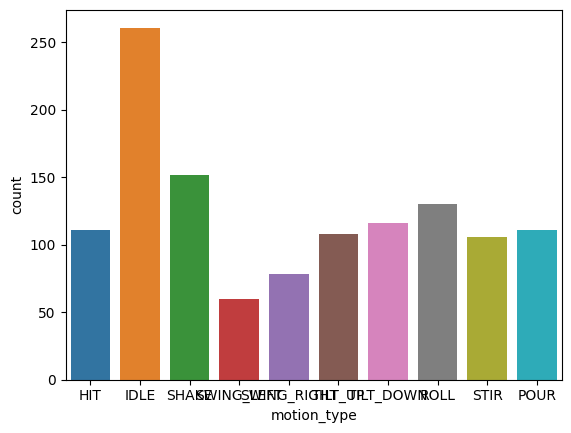

In [15]:
sns.countplot(df_train, x="motion_type", hue="motion_type")

In [16]:
len(df_train)

1233

<Axes: xlabel='motion_type', ylabel='count'>

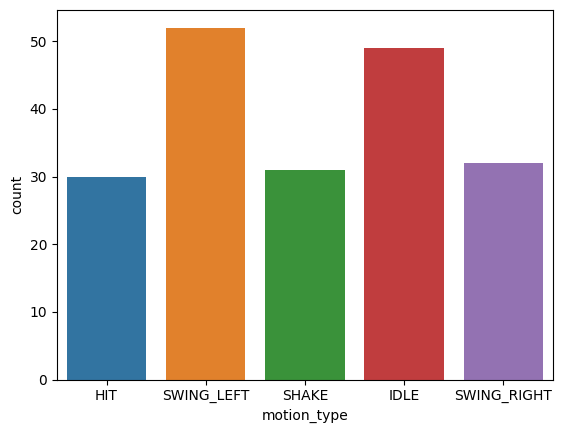

In [17]:
sns.countplot(df_test, x="motion_type", hue="motion_type")

In [18]:
len(df_test)

194

## Get X and y

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
def get_X_and_y(df: pd.DataFrame) -> tuple[np.array, np.array]:
    X_df = df.drop(columns=["motion_type"])
    y = df["motion_type"].values
    
    n_timesteps = 30
    channels = []
    match CHANNEL_CONFIG:
        case "accel":
            channels = ["accel_x", "accel_y", "accel_z"]
        case "gyro":
            channels = ["gyro_x", "gyro_y", "gyro_z"]
        case "mag":
            channels = ["mag_x", "mag_y", "mag_z"]
        case "ahrs":
            channels = ["ahrs_x", "ahrs_y", "ahrs_z", "ahrs_w"]
        case "g-a":
            channels = ["gyro_x", "gyro_y", "gyro_z", "accel_x", "accel_y", "accel_z"]
        case "g-m":
            channels = ["gyro_x", "gyro_y", "gyro_z", "mag_x", "mag_y", "mag_z"]
        case "a-m":
            channels = ["accel_x", "accel_y", "accel_z", "mag_x", "mag_y", "mag_z"]
        case "g-a-m":
            channels = ["gyro_x", "gyro_y", "gyro_z", "accel_x", "accel_y", "accel_z", "mag_x", "mag_y", "mag_z"]
        case _:
            channels = ["gyro_x", "gyro_y", "gyro_z", "accel_x", "accel_y", "accel_z", "mag_x", "mag_y", "mag_z", "ahrs_x", "ahrs_y", "ahrs_z", "ahrs_w"]
    n_channels = len(channels)

    X = np.zeros((len(df), n_channels, n_timesteps))

    for t in range(n_timesteps):
        for c, channel in enumerate(channels):
            col_name = f"{channel}_{t}"
    
            X[:, c, t] = X_df[col_name].values
            
    return X, y

In [21]:
X_train, y_train = get_X_and_y(df_train)
X_test, y_test = get_X_and_y(df_test)

In [22]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [23]:
le.classes_

array(['HIT', 'IDLE', 'POUR', 'ROLL', 'SHAKE', 'STIR', 'SWING_LEFT',
       'SWING_RIGHT', 'TILT_DOWN', 'TILT_UP'], dtype=object)

In [24]:
from sktime.classification.kernel_based import RocketClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier
from sktime.classification.deep_learning import InceptionTimeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [25]:
clf_minirocket = RocketClassifier(num_kernels=500, random_state=42) 

In [26]:
# clf_minirocket = KNeighborsTimeSeriesClassifier(n_neighbors=1)

In [27]:
clf_minirocket.fit(X_train, y_train)

RocketClassifier(num_kernels=500, random_state=42)

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [29]:
y_pred_train = clf_minirocket.predict(X_train)

In [30]:
print(accuracy_score(y_train, y_pred_train))
print(precision_score(y_train, y_pred_train, average="weighted"))
print(recall_score(y_train, y_pred_train, average="weighted"))
print(f1_score(y_train, y_pred_train, average="weighted"))

0.9983779399837794
0.9984066490106152
0.9983779399837794
0.9983820619769525


In [31]:
y_pred_test = clf_minirocket.predict(X_test)

In [32]:
print(accuracy_score(y_test, y_pred_test))
print(precision_score(y_test, y_pred_test, average="weighted", zero_division=0))
print(recall_score(y_test, y_pred_test, average="weighted", zero_division=0))
print(f1_score(y_test, y_pred_test, average="weighted", zero_division=0))

0.37628865979381443
0.447438584017812
0.37628865979381443
0.3798923518877567


In [33]:
print(confusion_matrix(y_test, y_pred_test))

[[ 0  1  0  0  3  1  6  0 19]
 [ 0 35  1 11  1  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  3  0  3 25  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [13  1  3  3  0 19 13  0  0]
 [ 1 30  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]]


In [34]:
from sklearn.metrics import classification_report

In [35]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.50      0.71      0.59        49
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.86      0.81      0.83        31
           5       0.00      0.00      0.00         0
           6       0.68      0.25      0.37        52
           7       0.00      0.00      0.00        32
           8       0.00      0.00      0.00         0

    accuracy                           0.38       194
   macro avg       0.23      0.20      0.20       194
weighted avg       0.45      0.38      0.38       194



c:\Users\user\Documents\Calvin\! Tugas Akhir\App\godot-websocket-server\onnx\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\user\Documents\Calvin\! Tugas Akhir\App\godot-websocket-server\onnx\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\user\Documents\Calvin\! Tugas Akhir\App\godot-websocket-server\onnx\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samp

In [36]:
from skl2onnx import to_onnx

In [37]:
from joblib import dump


dump(clf_minirocket, "clf_minirocket.joblib")

['clf_minirocket.joblib']

In [38]:
X_train.shape

(1233, 6, 30)

In [39]:
clf_minirocket.predict(X_train[0:1])

array([0])

In [40]:
print(repr(X_train[0:1]))

array([[[ 1.60504848e-01,  2.78401822e-01,  4.80598241e-01,
          4.80598241e-01,  6.99898839e-01,  9.83340323e-01,
          1.54839063e+00,  1.50074315e+00, -2.30922341e+00,
         -2.30922341e+00, -1.14184456e+01, -4.30308771e+00,
          4.14151382e+00,  4.83973265e+00,  4.83973265e+00,
          1.16476727e+00,  1.26754539e-02,  3.77209298e-02,
         -3.89273882e-01, -6.62330627e-01,  1.97156757e-01,
          1.37490499e+00,  2.03158498e+00,  1.83732998e+00,
          1.01144016e+00,  1.01144016e+00,  1.95935026e-01,
          5.95593592e-03,  3.35212290e-01,  6.93790197e-01],
        [ 3.73391397e-02, -2.92451736e-02, -1.70965910e-01,
         -1.70965910e-01, -3.47505957e-01, -3.65831912e-01,
         -3.34066927e-01, -1.38658774e+00, -4.84530687e+00,
         -4.84530687e+00, -2.64985704e+00,  3.31340933e+00,
         -1.01938136e-01, -3.46291876e+00, -3.46291876e+00,
         -2.93146586e+00, -7.51898766e-01,  1.01899958e+00,
          2.14054823e+00,  2.53211284e+

In [41]:
print(repr(y_train[0]))

np.int64(0)
